In [1]:
import pandas as pd

In [29]:
%matplotlib inline

In [2]:
df = pd.read_csv('../Data Extraction/25subs_500.csv')

In [3]:
df.head()

,comment,subreddit
0,follow up tweet:\r\n\r\n#[Check out tweets fro...,the_donald
1,The fake news media continues to prove his poi...,the_donald
2,NAILED IT. Says what everyone is thinking.,the_donald
3,We should all follow Trump’s lead in our perso...,the_donald
4,#HE SAID IT!,the_donald


In [4]:
classifiers = []

In [5]:
from sklearn.externals import joblib

In [6]:
for i in range(6):
    classifiers.append(joblib.load("lr_char_" + str(i) + ".joblib"))

In [7]:
train = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/train.csv')
test = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/test.csv')

In [8]:
all_text = pd.concat([train.comment_text, test.comment_text])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [10]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

In [11]:
word_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
char_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(2, 6), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
df_wordfeat = word_vectorizer.transform(df.comment)

In [14]:
df_charfeat = char_vectorizer.transform(df.comment)

In [15]:
df_feat = hstack([df_charfeat,df_wordfeat])

In [16]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [17]:
df['toxic'] = '0'
df['severe_toxic'] = '0'
df['obscene'] = '0'
df['threat'] = '0'
df['insult'] = '0'
df['identity_hate'] = '0'

In [18]:
i = 0
for class_name in class_names:
    df[class_name] = classifiers[i].predict_proba(df_feat)[:,1]
    i+=1

In [19]:
pd.unique(df['subreddit'])

array(['the_donald', 'news', 'politics', 'conservative', 'gaming',
       'Showerthoughts', 'science', 'movies', 'wholesomememes',
       'todayilearned', 'theredpill', 'imgoingtohellforthis',
       'cringeanarchy', 'shitpoliticssays', 'atheism', 'wholesomegifs',
       'aww', 'mademesmile', 'kotakuinaction', 'games', 'music', 'sports',
       'funny', '4chan', 'happy'], dtype=object)

In [23]:
pd.value_counts(df['subreddit'])

todayilearned           500
aww                     500
politics                500
theredpill              500
mademesmile             500
cringeanarchy           500
funny                   500
news                    500
happy                   500
gaming                  500
Showerthoughts          500
games                   500
atheism                 500
conservative            500
movies                  500
the_donald              500
science                 500
wholesomegifs           500
sports                  500
wholesomememes          500
kotakuinaction          500
4chan                   500
music                   500
imgoingtohellforthis    388
shitpoliticssays        368
Name: subreddit, dtype: int64

In [24]:
subs = pd.unique(df['subreddit'])
toxic_scores = []
for sub in subs:
    score = []
    for c in class_names:
        x = df[df['subreddit']==sub]
        score.append(x[c].sum()/x.shape[0])
    toxic_scores.append(score)

In [25]:
for i in range(len(subs)):
    print(subs[i])
    print(toxic_scores[i])

the_donald
[0.1428069952989659, 0.010388027728064391, 0.06866345915411601, 0.0034844043369759597, 0.05566202067497976, 0.011008626263975968]
news
[0.13684387966148046, 0.008279491682958452, 0.06732762504957998, 0.0033108929913154357, 0.051419395842557766, 0.009365930293472102]
politics
[0.14854396956832716, 0.010014830705107926, 0.08092811221982467, 0.0035875696427511657, 0.058495894943557926, 0.010930540737433752]
conservative
[0.11949778300436621, 0.007456499048835797, 0.05560706351427586, 0.003168800953949661, 0.04504486450989013, 0.010023544630869288]
gaming
[0.14933214005005846, 0.011586316315995503, 0.07922065600639525, 0.004154603466846317, 0.059168687788376174, 0.010383283240097208]
Showerthoughts
[0.14482519535768354, 0.010161276656653022, 0.07879887716765356, 0.003941365731742205, 0.06039775090434745, 0.010049702106751724]
science
[0.045383662392194206, 0.004667815963549548, 0.021962327786638803, 0.0024192707319469387, 0.020258081778865667, 0.005821975716682043]
movies
[0.116

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def plot_bar_x(i):
    f, ax = plt.subplots(figsize=(30,5)) 
    index = np.arange(len(subs))
    plt.bar(index, [x[i] for x in toxic_scores])
    plt.xlabel('Subreddit', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    plt.xticks(index, subs, fontsize=5, rotation=30)
    plt.title(class_names[i])
    plt.show()

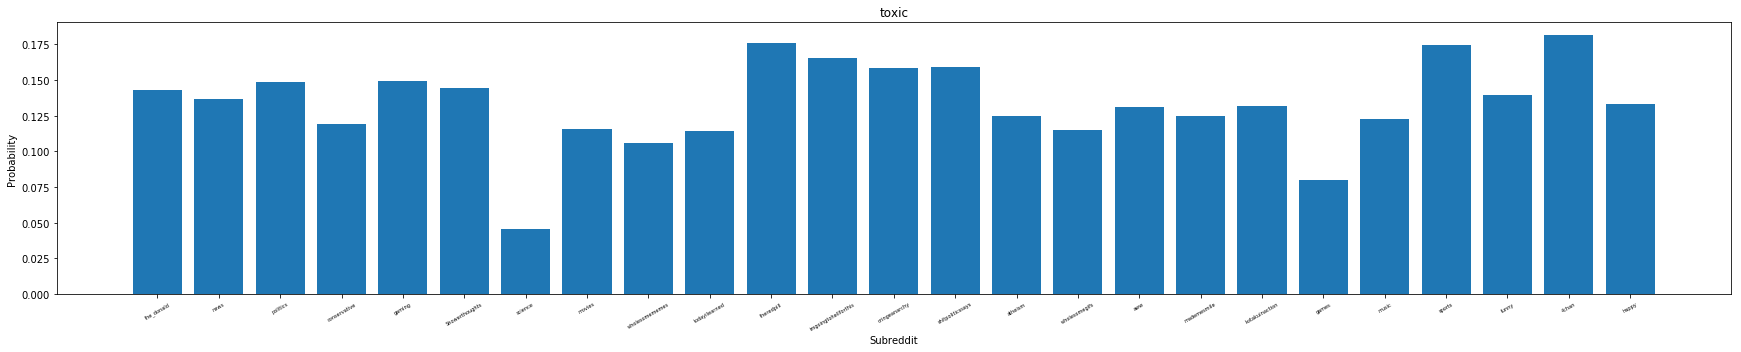

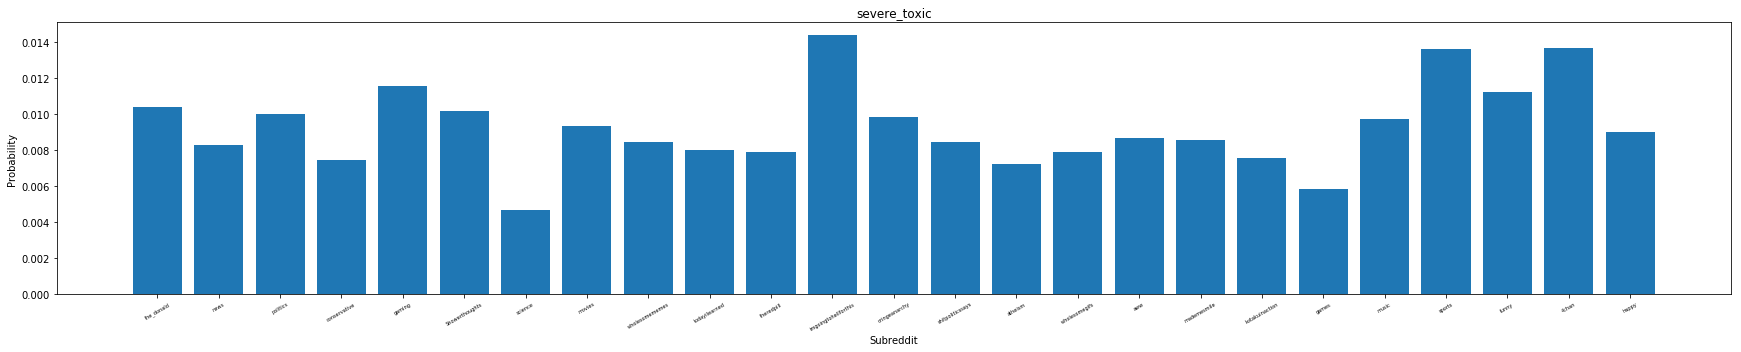

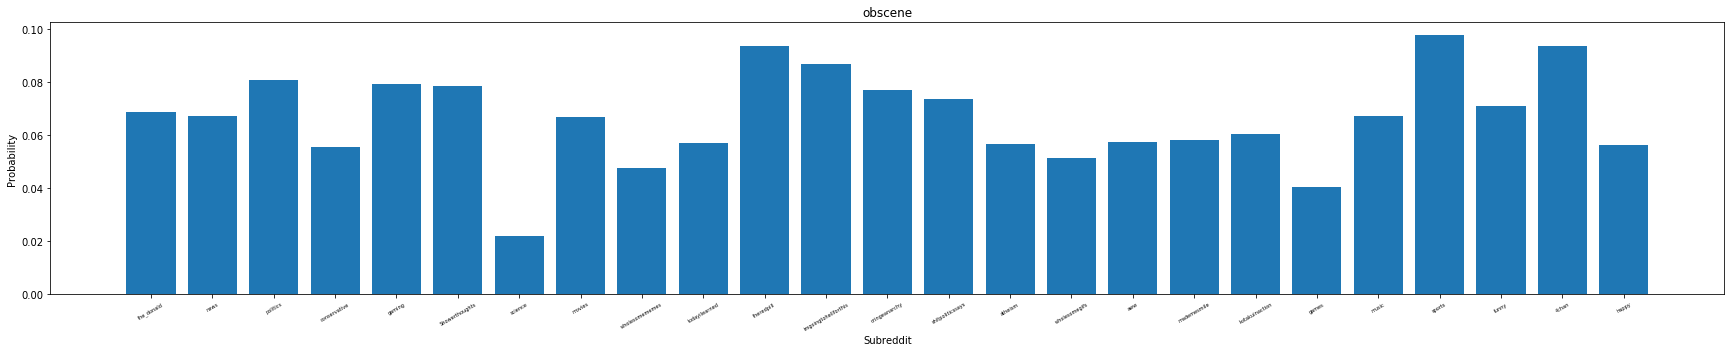

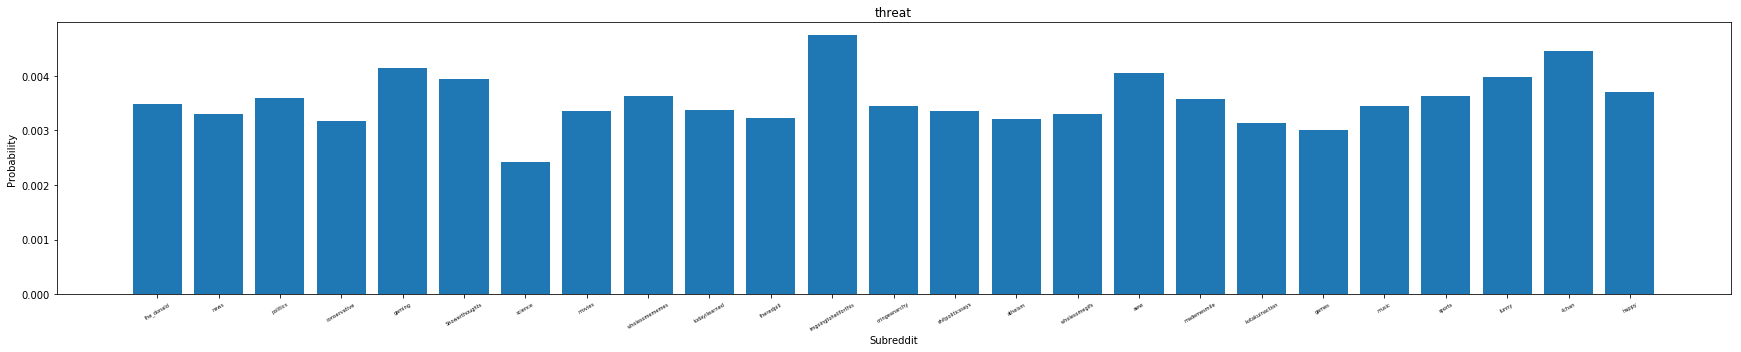

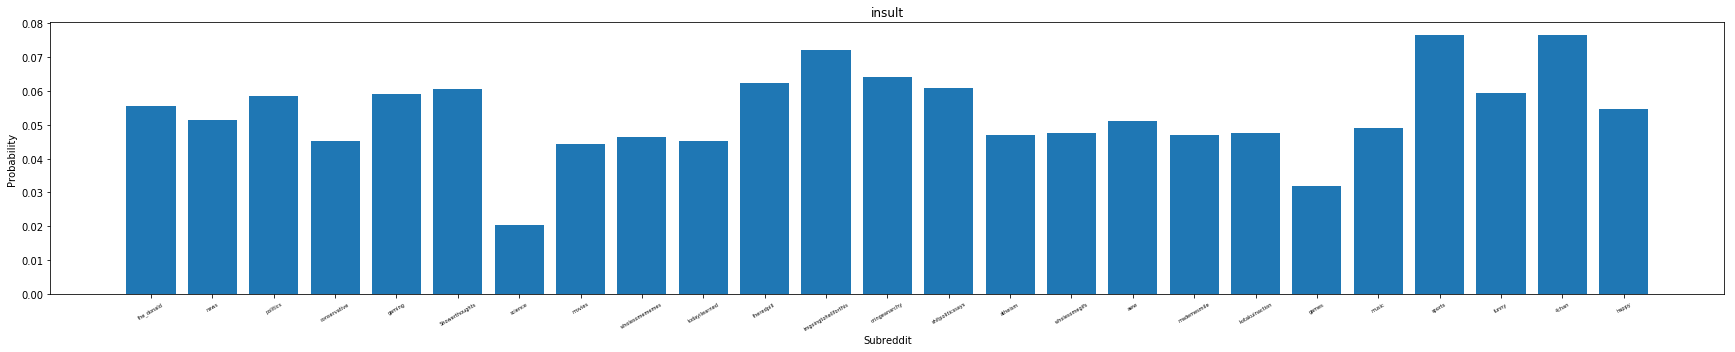

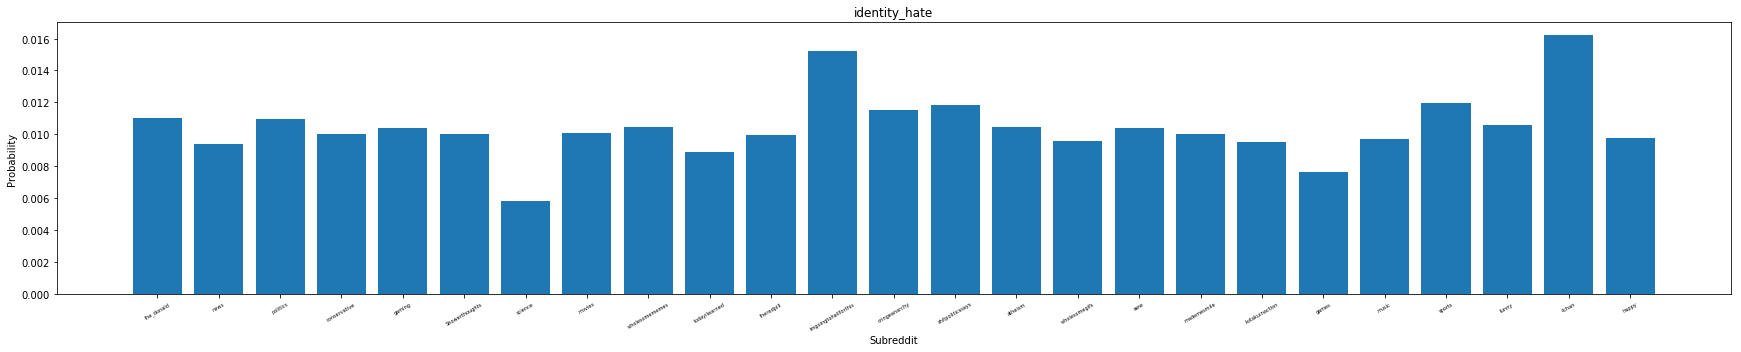

In [67]:
plot_bar_x(0)
plot_bar_x(1)
plot_bar_x(2)
plot_bar_x(3)
plot_bar_x(4)
plot_bar_x(5)

In [ ]:
c